In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("../data/parsed_logs_rad.csv")

In [29]:
configs = dict(
    # Baseline C100
    BaseC100="c100_res44_test_01_bn-relu_base.yaml",
    # "c100_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C100
    OrderInvC100="c100_res44_test_02_relu6-bn.yaml",
    # "c100_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C100="c100_res44_test_02_bn-relu6_base.yaml",
    BnRelu6C100="c100_res44_test_02_bn-relu6.yaml",
    # Order inversion + nan filter + Relu6
    OrderINanRelu6C100="c100_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C100
    GeluNanC100="c100_res44_test_02_gelu6_nans.yaml",

    # Baseline C10
    BaseC10="c10_res44_test_01_bn-relu_base.yaml",
    # "c10_res44_test_02_bn-relu6.yaml",
    BnRelu6C10="c10_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C10
    OrderInvC10="c10_res44_test_02_relu6-bn.yaml",
    # "c10_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C10="c10_res44_test_02_bn-relu6_base.yaml",
    OrderINanRelu6C10="c10_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C10
    GeluNanC10="c10_res44_test_02_gelu6_nans.yaml",

    MobileNetC100="cifar100_mobilenetv2_x1_4.yaml",
    MobileNetC10="cifar10_mobilenetv2_x1_4.yaml",

    Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    # Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    DeepLabV3="deeplabv3_resnet50_base",
    resnet50d="resnet50d",
    ViTPatch16_224="vit_base_patch16_224",
    ViTPatch16_384="vit_base_patch16_384",
    ViTPatchSam32_224="vit_base_patch32_224_sam",
    ViTPatch32_384="vit_base_patch32_384",
    ViTPatch14Huge_224="vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k",
    ViTPatch14Huge_336="vit_huge_patch14_clip_336.laion2b_ft_in12k_in1k",
    VitPatch32Base="vit_base_patch32_224.sam"
)
configs_inv = {v.replace(".yaml", ""): k for k, v in configs.items()}

In [30]:
df["config"] = df["config"].apply(lambda x: configs_inv[x])

In [31]:
df

,start_dt,config,ecc,hostname,logfile,batch_size,it,ker_time,acc_time,ker_err,acc_err,sdc,critical_sdc,evil_sdc,benign_sdc
0,2023-05-13 15:53:14,BaseC100,ON,carola20002,2023_05_13_15_53_14_c100_res44_test_01_bn-relu...,128,6398,0.013729,89.078879,4096,4096,1,0,0,0
1,2023-05-14 07:59:43,OrderINanRelu6C100,ON,carola20002,2023_05_14_07_59_43_c100_res44_test_02_relu6-b...,128,272,0.016203,5.539980,100,100,1,0,0,0
2,2023-05-12 23:35:00,BaseC100,ON,carola20002,2023_05_12_23_35_00_c100_res44_test_01_bn-relu...,128,6482,0.014065,0.000000,199,199,1,0,0,0
3,2023-05-12 23:35:00,BaseC100,ON,carola20002,2023_05_12_23_35_00_c100_res44_test_01_bn-relu...,128,24554,0.018692,461.276000,100,299,1,0,0,0
4,2023-05-13 00:23:25,BaseC100,ON,carola20002,2023_05_13_00_23_25_c100_res44_test_01_bn-relu...,128,313,0.013548,5.366949,57,57,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6714,2023-05-14 12:02:28,BaseC100,OFF,carola20003,2023_05_14_12_02_28_c100_res44_test_01_bn-relu...,128,9591,0.011908,114.783613,92,346,1,0,0,0
6715,2023-05-15 07:22:29,BaseC100,ON,carola20003,2023_05_15_07_22_29_c100_res44_test_01_bn-relu...,128,748,0.014744,10.628935,101,101,1,1,1,0
6716,2023-05-14 01:00:25,OrderINanRelu6C100,OFF,carola20003,2023_05_14_01_00_25_c100_res44_test_02_relu6-b...,128,1055,0.015102,0.000000,99,99,1,0,0,0
6717,2023-05-14 01:00:25,OrderINanRelu6C100,OFF,carola20003,2023_05_14_01_00_25_c100_res44_test_02_relu6-b...,128,5273,0.015179,0.000000,77,176,1,0,0,0


In [32]:
df["correct_predictions"] =  df["batch_size"] - df["evil_sdc"]

In [33]:
df["totally_correct"] = ((df["evil_sdc"] == 0) & (df["critical_sdc"] == 1)).astype(int)

In [34]:
to_save = df.groupby(["hostname", "config", "ecc"]).agg({"batch_size": max, "acc_time": sum, "sdc": sum, "critical_sdc": sum})

In [35]:
to_save["sdc_error_rate"] = to_save["sdc"] / to_save["acc_time"]
to_save["critical_error_rate"] = to_save["critical_sdc"] / to_save["acc_time"]


In [36]:
to_save

batch_size      acc_time   sdc  \
hostname    config             ecc                                   
carola20002 BaseC100           ON          128  17942.086588   215   
            OrderINanRelu6C100 ON          128   5403.773136   100   
carola20003 BaseBnRelu6C100    OFF         128   2667.330179  3320   
            BaseC100           OFF         128  14627.077732  1317   
                               ON          128   6913.763399   378   
            OrderINanRelu6C100 OFF         128  17729.973161  1111   
                               ON          128   1724.793439    20   
carolp20001 ViTPatch14Huge_224 OFF           4   2339.353759    24   
            ViTPatch14Huge_336 OFF           4   7131.781894    55   
            ViTPatch16_224     OFF           4   9986.304597   130   
            ViTPatch16_384     OFF           4   3358.579137    38   
            VitPatch32Base     OFF           4    756.437097     4   
            resnet50d          OFF           4    869.919105     7   

                                    critical_sdc  sdc_error_rate  \
hostname    config             ecc                                 
carola20002 BaseC100           ON             18        0.011983   
            OrderINanRelu6C100 ON              9        0.018506   
carola20003 BaseBnRelu6C100    OFF             1        1.244690   
            BaseC100           OFF            15        0.090038   
                               ON            258        0.054674   
            OrderINanRelu6C100 OFF            14        0.062662   
                               ON              0        0.011596   
carolp20001 ViTPatch14Huge_224 OFF             4        0.010259   
            ViTPatch14Huge_336 OFF             5        0.007712   
            ViTPatch16_224     OFF             7        0.013018   
            ViTPatch16_384     OFF             4        0.011314   
            VitPatch32Base     OFF             1        0.005288   
            resnet50d          OFF             3        0.008047   

                                    critical_error_rate  
hostname    config             ecc                       
carola20002 BaseC100           ON              0.001003  
            OrderINanRelu6C100 ON              0.001666  
carola20003 BaseBnRelu6C100    OFF             0.000375  
            BaseC100           OFF             0.001025  
                               ON              0.037317  
            OrderINanRelu6C100 OFF             0.000790  
                               ON              0.000000  
carolp20001 ViTPatch14Huge_224 OFF             0.001710  
            ViTPatch14Huge_336 OFF             0.000701  
            ViTPatch16_224     OFF             0.000701  
            ViTPatch16_384     OFF             0.001191  
            VitPatch32Base     OFF             0.001322  
            resnet50d          OFF             0.003449

In [37]:
to_save = to_save.drop(pd.IndexSlice["carola20003", "BaseBnRelu6C100", "OFF"])

<AxesSubplot: ylabel='hostname,config,ecc'>

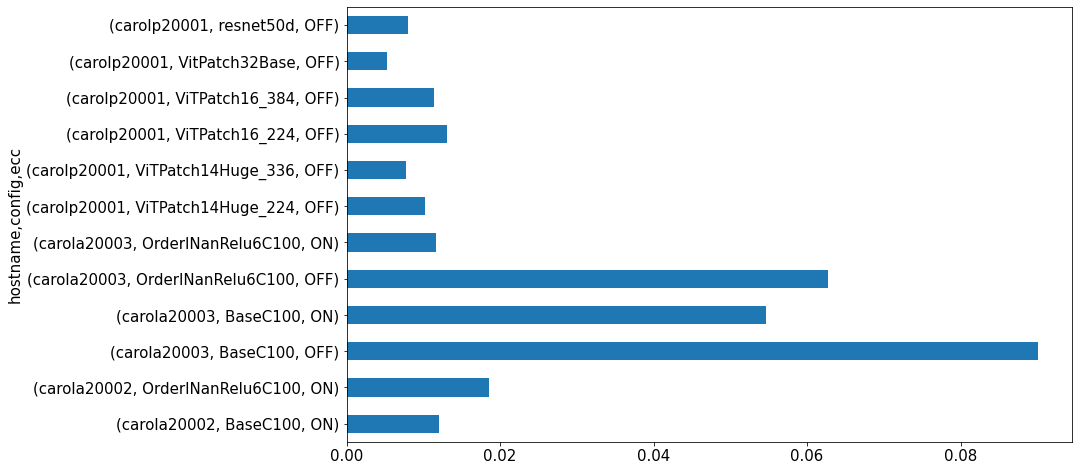

In [38]:
plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 15})
to_save["sdc_error_rate"].plot.barh()

<AxesSubplot: ylabel='hostname,config,ecc'>

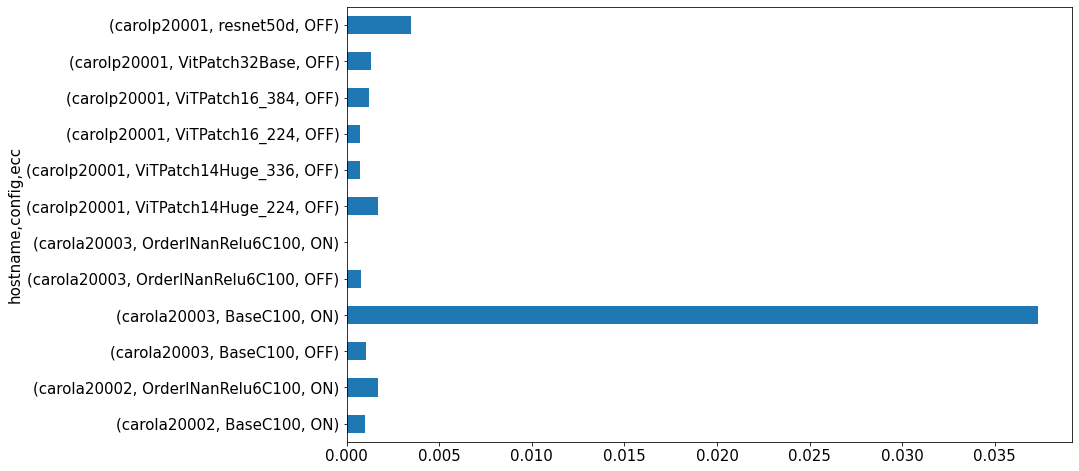

In [39]:
plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 15})
to_save["critical_error_rate"].plot.barh()